# 6.回归分析

## 6.1 一元线性回归

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 设置显示中文
plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False

#读取数据
df = pd.read_excel(r'./re1.xlsx')
df.head(5)

,容重,灰分
0,1.5,25
1,1.2,4
2,1.7,30
3,1.4,20
4,1.8,36


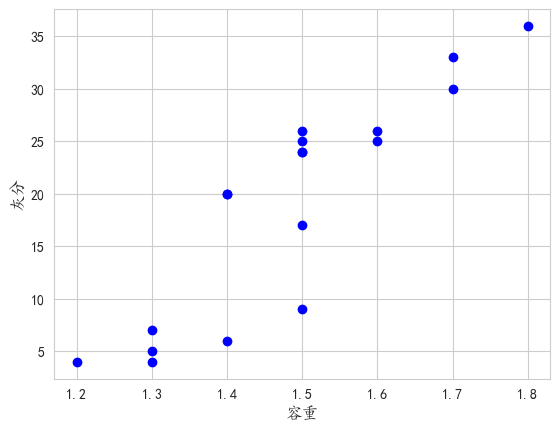

In [2]:
# dataframe中按列提取的结果是series，这里将使用的是series的值
X = df['容重'].values  #自变量
Y = df['灰分'].values #因变量

plt.scatter(X,Y,marker='o',c='b')
plt.xlabel('容重',fontsize=12)
plt.ylabel('灰分',fontsize=12)
plt.show()

### 6.1.1 使用OLS直接计算

In [3]:
#一元线性回归的参数估计，OLS算法
# 请结合课堂PPT中的OLS计算方法理解下列2行代码
b=np.sum((X-np.mean(X))*(Y-np.mean(Y)))/np.sum((X-np.mean(X))**2)
a=np.mean(Y)-b*np.mean(X)

print('应用普通最小二乘法估计的回归系数：a=%0.4f,b=%0.4f'%(a,b))
print('回归方程：y=%0.4f + %0.4f x'%(a,b))

应用普通最小二乘法估计的回归系数：a=-68.9503,b=59.2549
回归方程：y=-68.9503 + 59.2549 x


### 6.1.2 使用sklearn

In [4]:
from sklearn.linear_model import LinearRegression

# 模型搭建
model = LinearRegression()
model.fit(X,Y)

# 模型可视化
plt.scatter(X,Y)
plt.plot(X,model.predict(X),color='red')
plt.xlabel('容重')
plt.ylabel('灰分')
plt.show()

#查看系数,截距：线性回归方程构造
print('回归系数b=%0.4f，截距a=%.4f'%(model.coef_,model.intercept_))

ValueError: Expected 2D array, got 1D array instead:
array=[1.5 1.2 1.7 1.4 1.8 1.3 1.3 1.5 1.7 1.3 1.5 1.5 1.6 1.4 1.6 1.5 1.4 1.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### 6.1.3 使用stasmodels进行一元线性回归

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel(r'./re1.xlsx')
df.head(4)

In [ ]:
fields = df.columns.values
fields

In [ ]:
df_list = df.values
df_list

In [ ]:
data =np.matrix(df_list)
#自变量
X = np.array(df['容重'])
#因变量
Y=np.array(df['灰分'])

weight_model=sm.add_constant(X)
###使用Statsmodels的OLS函数进行线性回归。
result=sm.OLS(Y,weight_model).fit()
result.summary()

### 显著性检验

In [ ]:
'''
常量和回归系数的的标准误计算过程：上图中的sd(beta0),sd(beta1)计算公式。

'''
####残差，从回归结果对象中获取
res=result.resid 
###残差方差与标准差,注意方差的计算方式
res_var=np.sum((res-np.mean(res))**2)/(len(res)-2)
res_std=res_var**0.5 
### 求自变量weight的校正平方和
sxx=np.sum((X-np.mean(X))**2)
###截距项beta0的标准误
stderr0=res_std*np.sqrt(1/len(X)+np.mean(X)**2/sxx)
print('常数项（截距项）beta0的标准误（std err）：%0.3f'%stderr0)
### 回归系数beta1的标准误
stderr1=res_std/np.sqrt(sxx)
print('\n回归系数beta1的标准误（std err）：%0.3f'%stderr1)

In [ ]:
'''
回归参数检验：回归常量beta0和回归系数beta1的t值以及t检验
'''
###回归参数beta0,beta1的标准误
t0=a/stderr0
t1=b/stderr1
print('回归参数beta0、beta1的t值分别为：%0.3f,%0.3f'%(t0,t1))
'''
t检验的拒绝域|T|>t'(n-2),分解为P(T<-t')+P(T>t')，即双侧检验的两个概率之和
'''
n=len(X)
##分别计算beta0和beta1的t检验p值
p0=2*st.t.sf(t0,n-2)
p1=2*st.t.sf(t1,n-2)
print('\n回归参数beta0、beta1的t检验P值分别为：{},{}'.format(p0,p1))

In [ ]:
'''
F检验。
'''
###F值只计算回归系数，无回归常数beta0
F1=beta1**2*sxx/res_var
print('回归系数的F值为：%0.2f'%F1)

###F检验的P值计算，使用生存函数sf计算
p_F1=st.f.sf(F1,1,n-2)
print('\n回归系数的F检验P值为：%0.8f'%p_F1)

In [ ]:
'''
R方以及调整后R方
'''
###残差平方和，总平方和与回归平方和
sse=np.sum(res**2) #残差平方和
#总平方和：sum(y-mean(y)^2)，即因变量减去其均值之后平方和
sst=np.sum((bp-np.mean(bp))**2) 
#回归平方和：sum((y_hat-mean(y))^2)，即因变量回归值减去因变量的平均值的平方和
y_hat=result.predict()#调用predict函数获得y_hat
ssr=np.sum((y_hat-np.mean(bp))**2)
###两种方法计算R方
R2=1-sse/sst #或者
R2=ssr/sst #结果一致，精度稍微有差别
###调整后R方,sse/(n-2)=残差平方和/残差自由度,sst/(n-1)=总平方和/模型自由度
adjR2=1- (sse/(n-2))/(sst/(n-1))
print('R方和调整后R方的值分别为：%0.3f, %0.3f'%(R2,adjR2))

## 6.2 多元线性回归

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
# 设置显示中文
plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['axes.unicode_minus'] = False
#读取数据
df = pd.read_excel('./re2.xlsx')
df.head(10)

In [ ]:
X = df[['x1','sqg','sio','feo','alo','cao','mgo','so']]  #这里的自变量必须写成二维形式，一个因变量可能对应多个自变量
Y = df['tb']
#Z=df['ww']
# 模型搭建
model = LinearRegression()
model.fit(X,Y)
#查看系数,截距：线性回归方程构造
print("自变量：",df.columns.values)
print("回归系数：",model.coef_)
print("截距：",model.intercept_)

## 6.3 线性回归示例
### 请参考上述多元线性回归示例，完成本例中的多元线性回归分析。

In [ ]:
'''
使用Statsmodels进行线性回归，分析体重与血压之间的关系
自变量为体重，因变量为血压
使用OLS模型进行线性回归，OLS为“普通最小二乘(ordinary least squares)”的英文缩写
'''
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

###自变量与因变量数据
# weight=np.array([165,167,180,155,212,175,190,210,200,149,158,169,170,
#             172,159,168,174,183,215,195,180,143,240,235,192,187])
# bp=np.array([130,133,150,128,151,146,150,140,148,125,133,135,150,
#              153,128,132,149,158,150,163,156,124,170,165,160,159])
df = pd.read_excel(r'./data.xlsx',sheet_name= 'Sheet2', header= 0)
# print(df)
fields = df.columns.values
print(fields)
df_list = df.values
data =np.matrix(df_list)
# print(data)
weight = np.array(df['SiO2'])
bp = np.array(df['CaO'])
###add_constant函数为估计截距项增加一个值为1的常量，公式为：Y~1+X
weight_model=sm.add_constant(weight)

###使用Statsmodels的OLS函数进行线性回归。
result=sm.OLS(bp,weight_model).fit()
result.summary()

In [ ]:
df.head(10)

In [ ]:
import  seaborn as sns
# 下面两行代码是设置图形的中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(10,5))
sns.regplot(weight,bp)
plt.xlabel('SiO2')
plt.ylabel('CaO')
plt.title('SiO2-CaO回归直线')
plt.show()
print('截距：\n',result.params[0])
print('系数：\n',result.params[1])

## 请参考上述多元线性回归示例，完成本例中的多元线性回归分析。